# Importing all the right functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the COLVAR file

In [2]:
data=pd.read_csv('files/combine.csv',delim_whitespace=True,header=0,skipfooter=1,skipinitialspace=True,names=['Time','d','uwall.bias','uwall.force2','metad.bias','metad.work','ct'])
data['ct'] = data['ct'].str.replace('"', '')
data.index = range(len(data))
data.head(10)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


# Assigning weights to each line
names=['Time','d','uwall.bias','uwall.force2','metad.bias','metad.work','ct']

In [3]:
expt=[]
wt=[]
for i in range(len(data)):
    
    x=data['metad.bias'].iloc[i]
    y=float(data['ct'].iloc[i])
    expt.append(np.exp(x-y+47))

data['e(v-ct)']=expt
data.head(3)

,Time,d,uwall.bias,uwall.force2,metad.bias,metad.work,ct,e(v-ct)
0,1.0,2.470411,0.0,0.0,0.000000,0.000000,0.0,2.581313e+20
1,2.0,2.501739,0.0,0.0,1.643539,1.999999,0.0,1.335428e+21
2,3.0,2.702078,0.0,0.0,0.000000,3.858799,0.0,2.581313e+20


In [4]:
np.min(data['e(v-ct)']), np.max(data['e(v-ct)'])
np.sum(data['e(v-ct)'])

6.3021251024907099e+21

# Defining the histogram function

In [8]:
def making_histogram(distance, weights):
    ending=4.5;bins=150; binsize=(ending)/bins
    hist=np.zeros((bins,2),dtype=np.float64)

    for i in range(bins):
        hist[i][0] = binsize/2.0 + i*binsize

    for i in range(len(distance)):
        hist[int(distance.iloc[i]/binsize)][1] += weights.iloc[i]
    hist[:,1] = -2.5*np.log(hist[:,1]/np.sum(weights))
    return hist



# Trying to reproduce the original curve

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


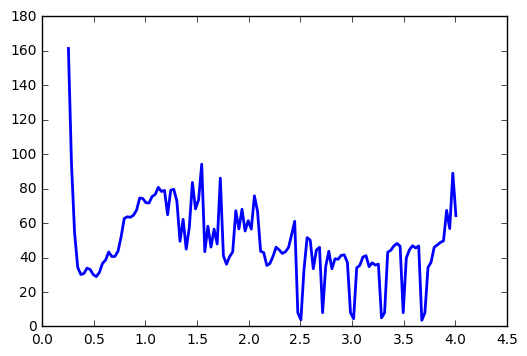

In [9]:
yoyo= making_histogram(data['d'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

# Reading in new distances

In [11]:
distances=pd.read_csv('files/DISTANCE_200.csv',delim_whitespace=True,header=0,skipfooter=1,skipinitialspace=True)
distances.head(3)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,time,d_NdeSNa,d_NdeNde,d_NdeC5,d_NdeNd,d_SNaSNa,d_SNaC5,d_SNaNd,d_C5Nd,d_C5C5,d_NdNd
0,1.0,2.321207,2.455949,2.505461,2.034655,2.471135,2.633836,2.186904,2.155133,2.559485,2.384335
1,2.0,2.319503,2.491670,2.471433,2.028357,2.508277,2.639668,2.222608,2.220903,2.588987,2.465904
2,3.0,2.483395,2.635394,2.633201,2.172045,2.704032,2.843174,2.395958,2.440351,2.863056,2.598290


# Plotting one of the variables

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


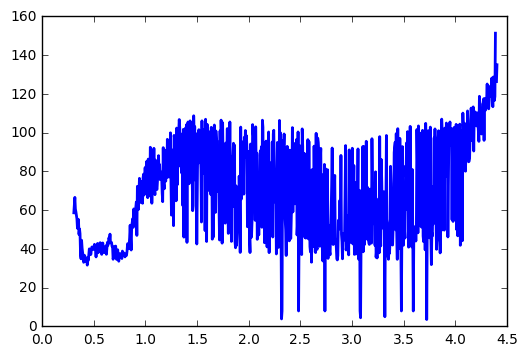

In [17]:
yoyo= making_histogram(distances['d_NdeSNa'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()